# 2. Topic modelling

## Setup

In [1]:
%run __init__.py

In [2]:
import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/home/alejandro/.envs/edma/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
RANDOM_SEED=42

## Loading the dataframe

In [4]:
GIT_FILE_PATH = os.path.join(NOTEBOOK_1_RESULTS_DIR, 'git_dataframe.pkl')

git_df = pd.read_pickle(GIT_FILE_PATH)

## Preprocessing text

In [5]:
git_repositories = git_df['full_text_cleaned'].values

In [6]:
MAX_CHAR_LENGTH = 100000

git_repositories = [r[:MAX_CHAR_LENGTH] for r in git_repositories]

In [7]:
import en_core_web_md

from herc_common.text import TextPreprocessor


custom_stop_words = {"merge", "branch", "master", "refs", "svn",
                     "branch", "pull", "request", "fix", "ref",
                     "error", "add", "file", "bug"}

git_preprocessor = TextPreprocessor(en_core_web_md, custom_stop_words)
preprocessed_texts = git_preprocessor.fit_transform(git_repositories)

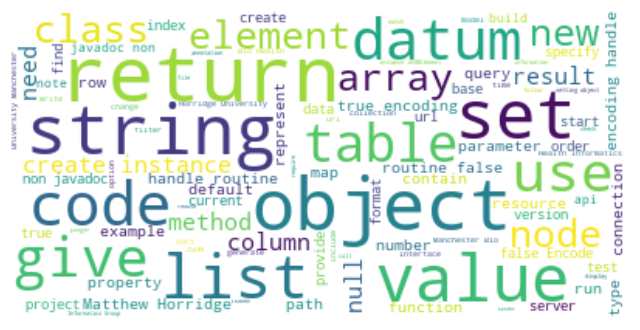

In [8]:
from herc_common.text import plot_word_cloud

complete_text = ' '.join([' '.join(token) for token in preprocessed_texts])

plot_word_cloud(complete_text)

## LDA

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def dummy(doc):
    return doc


tf_vectorizer = CountVectorizer(preprocessor=dummy, tokenizer=dummy, ngram_range=(1, 2))
dtm_tf = tf_vectorizer.fit_transform(preprocessed_texts)

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

from herc_common.topic_modeling import base_scoring_function, compute_model_results


lda_scoring_func = lambda clf, X: base_scoring_function(vectorizer=tf_vectorizer,
                                        texts=preprocessed_texts, model=clf, X=X)


lda_results = compute_model_results(LatentDirichletAllocation, dtm_tf,
                                    lda_scoring_func, seed=RANDOM_SEED,
                                    min_topics=5, max_topics=70, max_iter=100)
lda_results

/home/alejandro/.envs/edma/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/alejandro/.envs/edma/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-b4b34d2f186d>", line 12, in <module>
    min_topics=5, max_topics=70, max_iter=100)
  File "/home/alejandro/.envs/edma/lib/python3.7/site-packages/herc_common/topic_modeling.py", line 17, in compute_model_results
    model.fit(X)
  File "/home/alejandro/.envs/edma/lib/python3.7/site-packages/sklearn/decomposition/_lda.py", line 580, in fit
    batch_update=True, parallel=parallel)
  File "/home/alejandro/.envs/edma/lib/python3.7/site-packages/sklearn/decomposition/_lda.py", line 465, in _em_step
    _dirichlet_expectation_2d(self.components_))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alejandro/.envs/edma/lib/python3.7/site-packages/IPython/core/interactiveshel

KeyboardInterrupt: 

In [14]:
from herc_common.topic_modeling import get_best_model, print_results_info

print_results_info(lda_results)
best_lda_model = get_best_model(lda_results)

Best model parameters: {'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 100, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}
Topic coherence: -1.207158722215103


In [15]:
from herc_common.topic_modeling import print_top_words

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(best_lda_model, tf_feature_names, 10)

Topic #0: create instance create instance JAXBElement instance JAXBElement test value object return string
Topic #1: License term program GNU Public General Public License General Public GNU General license
Topic #2: copyright software use include provide list condition redistribution contributor code
Topic #3: object column disease array datum function table value term setting
Topic #4: License version Public GNU General Public General Public License distribute program GNU General



In [16]:
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tf, tf_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  30.635004
1       51.163364 -159.968018       2        1  25.666734
3      -73.144554   21.523815       3        1  24.601823
4      -66.410133 -110.606438       4        1  12.755974
0       54.417324   12.443444       5        1   6.340465, topic_info=                 Term        Freq       Total Category  logprob  loglift
2854          License  702.000000  702.000000  Default  30.0000  30.0000
10951          create  272.000000  272.000000  Default  29.0000  29.0000
18342        instance  143.000000  143.000000  Default  28.0000  28.0000
1900              GNU  252.000000  252.000000  Default  27.0000  27.0000
1964   General Public  250.000000  250.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
24954        position    9.923735   54.464723   Topic5  -6.6339   1.0556
28352             run   10.575726  126.602682   Topic5  -6.5702   0.2757
10381         contain   10.440543  113.085150   Topic5  -6.5831   0.3758
19865            list   10.957461  280.398309   Topic5  -6.5348  -0.4840
15165            find    9.923827   98.438988   Topic5  -6.6338   0.4637

[333 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
42         4  0.985368  API content
89         5  0.847498          AUG
90         5  0.847498    AUG codon
231        1  0.076593       Apache
231        3  0.047871       Apache
...      ...       ...          ...
35058      2  0.455441        write
35058      3  0.121451        write
35058      4  0.024290        write
35058      5  0.024290        write
35184      5  0.822030          xsi

[581 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

# LSA

In [58]:
from sklearn.decomposition import TruncatedSVD

lsa_scoring_func = lda_scoring_func

lsa_results = compute_model_results(TruncatedSVD, dtm_tf, lsa_scoring_func, 
                                    seed=RANDOM_SEED, min_topics=5,
                                    max_topics=50)
lsa_results

{TruncatedSVD(n_components=5, random_state=42): -2.7263184184549134,
 TruncatedSVD(n_components=6, random_state=42): -2.6647755201085337,
 TruncatedSVD(n_components=7, random_state=42): -3.298584424246684,
 TruncatedSVD(n_components=8, random_state=42): -2.831036038245638,
 TruncatedSVD(n_components=9, random_state=42): -3.1808049443374693,
 TruncatedSVD(n_components=10, random_state=42): -3.2316908823168626,
 TruncatedSVD(n_components=11, random_state=42): -2.984664162386707,
 TruncatedSVD(n_components=12, random_state=42): -3.001153408162706,
 TruncatedSVD(n_components=13, random_state=42): -2.832399269239328,
 TruncatedSVD(n_components=14, random_state=42): -2.6832688225731802,
 TruncatedSVD(n_components=15, random_state=42): -2.6879406831593773,
 TruncatedSVD(n_components=16, random_state=42): -2.5454683105025238,
 TruncatedSVD(n_components=17, random_state=42): -2.4126839215778904,
 TruncatedSVD(n_components=18, random_state=42): -2.807065196250012,
 TruncatedSVD(n_components=19, 

## NMF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(preprocessor=dummy, tokenizer=dummy, ngram_range=(1, 1))
dtm_tfidf = tfidf_vectorizer.fit_transform(preprocessed_texts)

In [18]:
from sklearn.decomposition import NMF

nmf_scoring_func = lambda clf, X: base_scoring_function(vectorizer=tfidf_vectorizer,
                                                        texts=preprocessed_texts, model=clf, X=X)

nmf_results = compute_model_results(NMF, dtm_tfidf, nmf_scoring_func, 
                                    seed=RANDOM_SEED, min_topics=5,
                                    max_topics=60, max_iter=400)
nmf_results

/home/alejandro/.envs/edma/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/alejandro/.envs/edma/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/alejandro/.envs/edma/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/alejandro/.envs/edma/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/alejan

{NMF(max_iter=400, n_components=5, random_state=42): -2.9006280690065065,
 NMF(max_iter=400, n_components=6, random_state=42): -3.6534199308245725,
 NMF(max_iter=400, n_components=7, random_state=42): -4.343839778921162,
 NMF(max_iter=400, n_components=8, random_state=42): -4.755004424413651,
 NMF(max_iter=400, n_components=9, random_state=42): -5.0422170407906535,
 NMF(max_iter=400, n_components=10, random_state=42): -4.8699669024549355,
 NMF(max_iter=400, n_components=11, random_state=42): -6.468766969948006,
 NMF(max_iter=400, n_components=12, random_state=42): -5.895543929254789,
 NMF(max_iter=400, n_components=13, random_state=42): -5.916784548072114,
 NMF(max_iter=400, n_components=14, random_state=42): -5.669337398143703,
 NMF(max_iter=400, n_components=15, random_state=42): -5.887829809525798,
 NMF(max_iter=400, n_components=16, random_state=42): -5.979385465744434,
 NMF(max_iter=400, n_components=17, random_state=42): -6.522137281020707,
 NMF(max_iter=400, n_components=18, ran

In [19]:
print_results_info(nmf_results)
best_nmf_model = get_best_model(nmf_results)

Best model parameters: {'alpha': 0.0, 'beta_loss': 'frobenius', 'init': None, 'l1_ratio': 0.0, 'max_iter': 400, 'n_components': 55, 'random_state': 42, 'shuffle': False, 'solver': 'cd', 'tol': 0.0001, 'verbose': 0}
Topic coherence: -1.023236812733186


In [20]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(best_nmf_model, tfidf_feature_names, 10)

Topic #0: copyright software licence value use redistribution code condition return property
Topic #1: optional tablesorter default rule value sorting sort string column autocomplete
Topic #2: License MySQL General GNU Public program term Free Software Foundation
Topic #3: TBox concept subsumption info ABox consistency reasoner definition check format
Topic #4: application compile role action war Flash constraint auth server url
Topic #5: Arvados SPDX Authors identifier copyright reserve license right collection ESnormal
Topic #6: TERMite termite pprint docstore TExpress import specify endpoint texpress DOCstore
Topic #7: sentence AIDA Claims Kuhn Tobias proceeding Sentences publication ignore Language
Topic #8: miscellanelous vm stuff course training lose place delete term Free
Topic #9: object column setting array table row DataTables element function node
Topic #10: uploader virtualenv run venv tool bin enter use build activate
Topic #11: simon class termite new string create urlcon